In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to the database
conn = sqlite3.connect('sales_data.db')

In [3]:
# Create database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [4]:
# Create table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [5]:
# Insert sample data
sales_data = [
    ('iPhone', 10, 999),
    ('Samsung', 15, 799),
    ('Google Pixel', 7, 699),
    ('OnePlus', 12, 499),
    ('Xiaomi', 20, 399),
]

In [6]:
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

conn.commit()
conn.close()

print("Database created with sample data!")

Database created with sample data!


In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Connect to the database
conn = sqlite3.connect('sales_data.db')

In [9]:
# Run SQL Query
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [10]:
# Load results into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print("Sales Summary:")
print(df)

Sales Summary:
        product  total_qty  revenue
0  Google Pixel          7   4893.0
1       OnePlus         12   5988.0
2       Samsung         15  11985.0
3        Xiaomi         20   7980.0
4        iPhone         10   9990.0


<Figure size 800x500 with 0 Axes>

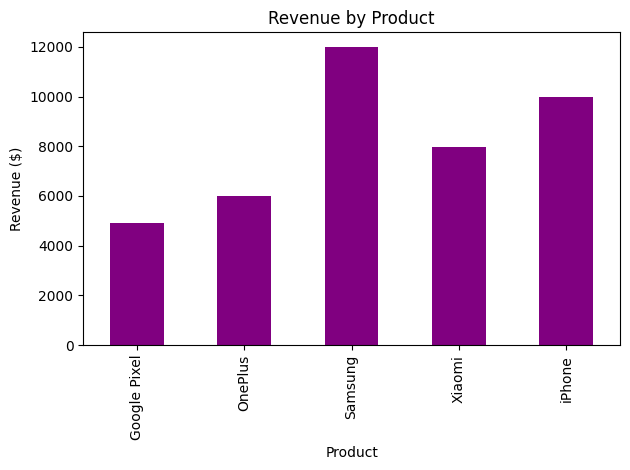

In [12]:
# Plot bar chart of revenue by product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', color='purple', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('sales_chart.png')  # Save chart as PNG
plt.show()

# Close the connection
conn.close()